#### boxplot : 범위를 볼 때 쓴다,countplot: 레이블 별로 개수를 보는데 이용!, violinplot : 각 범주별 데이터의 분포를 본다, heatmap: 이게 제일 중요, 데이터의 상관 관계나 값의밀도를 시각화! 
#### kdeplot, displot, histplot , scatterplot(산점도),lineplot 도 포함 되었움 
### 제일 중요한거 box,count,heatmap,line,scatterplot!!!!!!!!!

In [12]:
# Blood_Pressure_Abnormality 타겟 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/min22/Desktop/Artifical intelligence/BP_data.csv")
df


,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


#### Physical_activity : 신체활동지수 , salt_content_in_the_diet : 염분섭취량인듯, alcohol_consumption_per_day:하루동안 알코올 섭취량 ,Adrenal_and_thyroid_disorders:갑상선 장애가 있나없나
##### 결측치 제거 , 특정 클래스의 값을 바꾸는 방법 , chronic를 2로 바꾸고 , 결측치 pregnancy도 Nan있어서 이걸 바꾸는거 0으로 

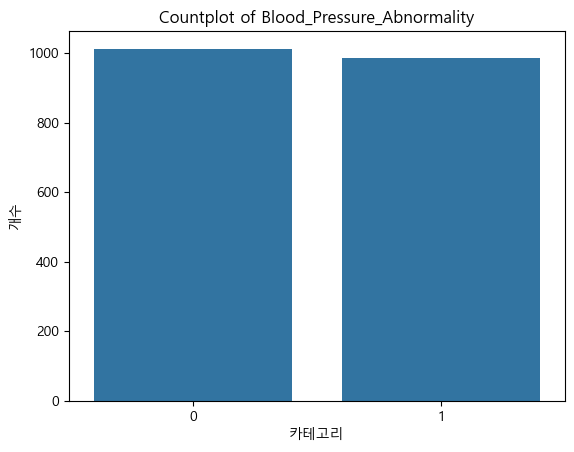

In [14]:
df.columns
# df[""] = df[""].fillna(2) 특정 칼럼을 바꾸는 함수

# df["Income"] = df["Income"].fillna(df["Income"].median()) 중간값으로 대체 
# 지금 한게 countplot 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

sns.countplot(x=df["Blood_Pressure_Abnormality"])
plt.title("Countplot of Blood_Pressure_Abnormality")
plt.xlabel("카테고리")
plt.ylabel("개수")
plt.show()

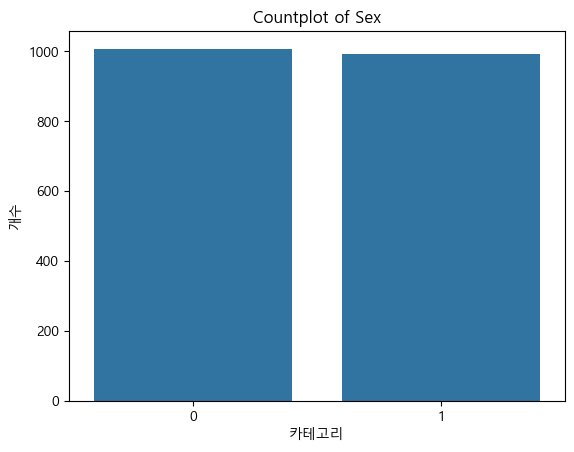

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.countplot(x=df["Sex"])
plt.title("Countplot of Sex")
plt.xlabel("카테고리")
plt.ylabel("개수")
plt.show()

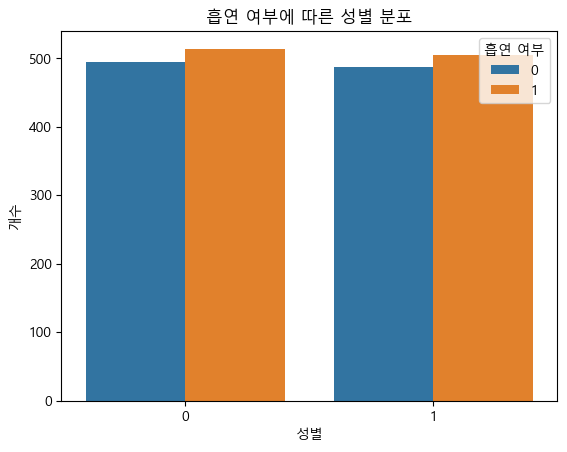

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

sns.countplot(x=df["Sex"], hue=df["Smoking"])
plt.title("흡연 여부에 따른 성별 분포")
plt.xlabel("성별")
plt.ylabel("개수")
plt.legend(title="흡연 여부")
plt.show()

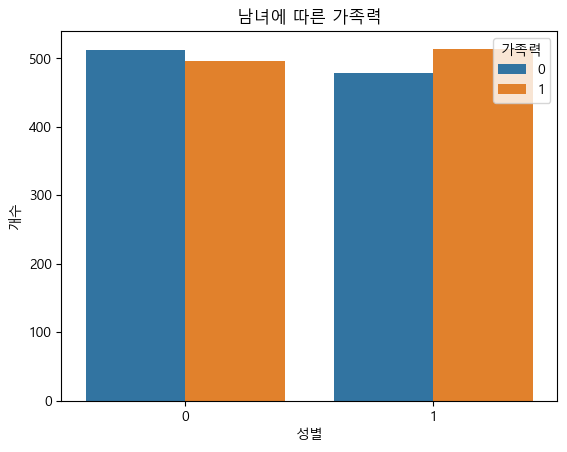

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

sns.countplot(x=df["Sex"], hue=df["Chronic_kidney_disease"])
plt.title("남녀에 따른 가족력")
plt.xlabel("성별")
plt.ylabel("개수")
plt.legend(title="가족력")
plt.show()

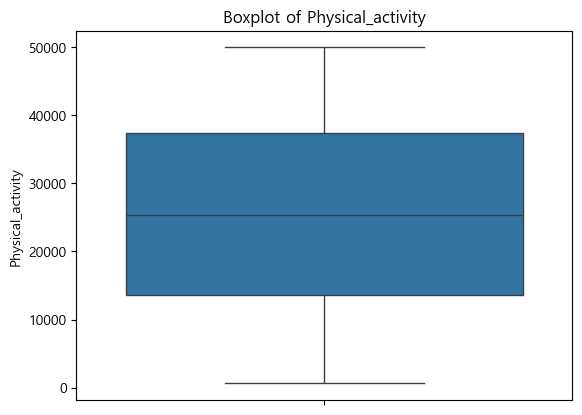

In [18]:
# 여기는 boxplot 
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 깨짐 방지를 위한 설정 (필요한 경우만)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 박스플롯 그리기
sns.boxplot(y=df["Physical_activity"])  # y축만 넣으면 수직 박스플롯
plt.title("Boxplot of Physical_activity")
plt.show()

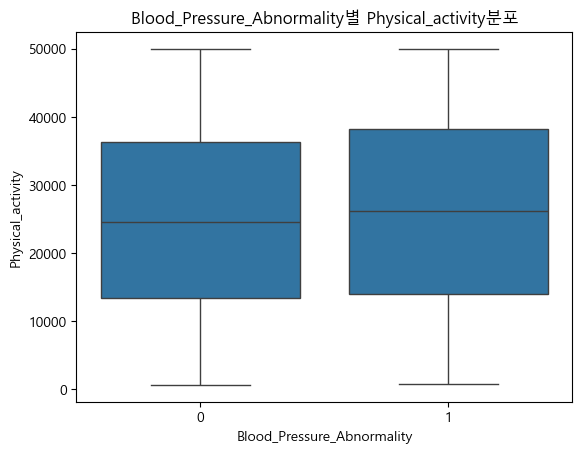

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정 (필요한 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 레이블에 따라 특정 컬럼의 분포 시각화
sns.boxplot(x=df["Blood_Pressure_Abnormality"], y=df["Physical_activity"])  #앞에게 레이블 컬럼, 뒤에게 범주 
plt.title("Blood_Pressure_Abnormality별 Physical_activity분포")
plt.xlabel("Blood_Pressure_Abnormality")
plt.ylabel("Physical_activity")
plt.show()

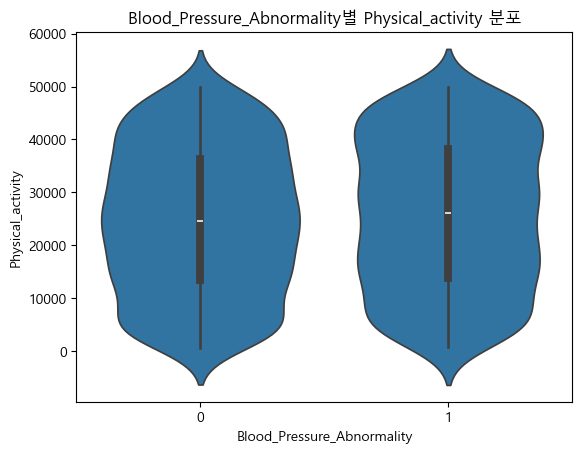

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정 (필요한 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# violinplot 그리기
sns.violinplot(x=df["Blood_Pressure_Abnormality"], y=df["Physical_activity"])
plt.title("Blood_Pressure_Abnormality별 Physical_activity 분포")
plt.xlabel("Blood_Pressure_Abnormality")
plt.ylabel("Physical_activity")
plt.show()

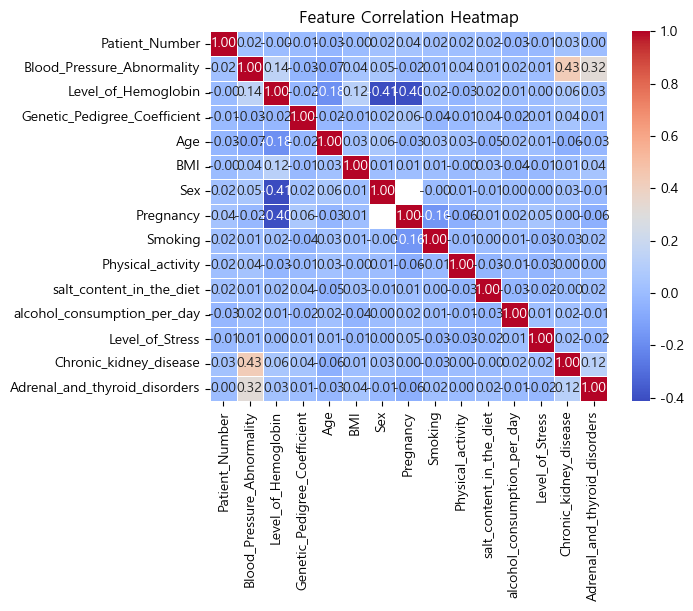

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# 0.3정도 이상이면 상관관계가 있다 
# 여기서는 가족력이랑, 갑상선! 이게 지금 상관관계가 있음 

# 상관 행렬 계산 (숫자형 데이터에 대해서만)
correlation_matrix = df.corr()

# Heatmap 그리기
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

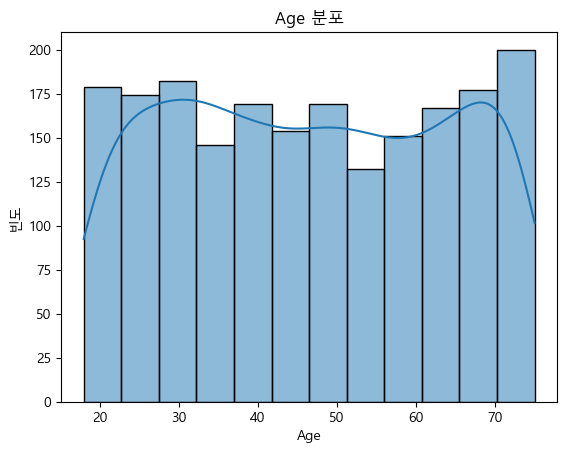

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# 이건 histplot 
# 특정 컬럼의 히스토그램 그리기
sns.histplot(df["Age"], kde=True)  # kde=True: 커널 밀도 추정선 추가
plt.title("Age 분포")
plt.xlabel("Age")
plt.ylabel("빈도")
plt.show()

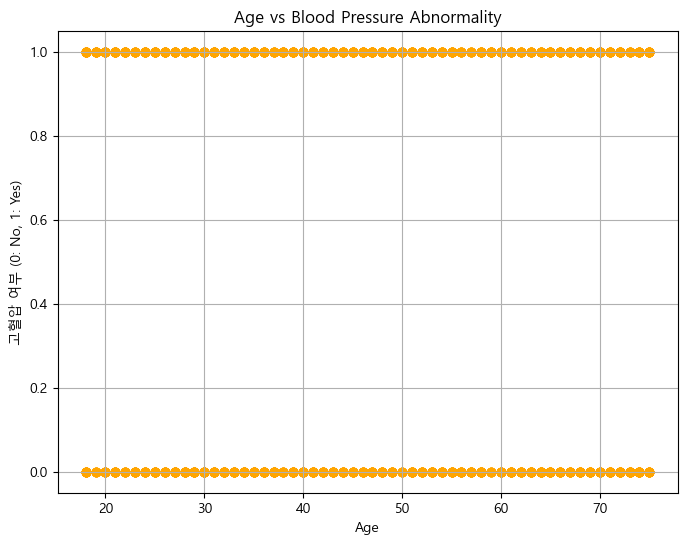

In [23]:
import matplotlib.pyplot as plt

# Age와 고혈압 여부 추출
age_data = df["Age"]
high_blood_pressure = df["Blood_Pressure_Abnormality"]

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(age_data, high_blood_pressure, color='orange', alpha=0.7)
plt.title("Age vs Blood Pressure Abnormality")
plt.xlabel("Age")
plt.ylabel("고혈압 여부 (0: No, 1: Yes)")
plt.grid(True)
plt.show()

C:\Users\min22\AppData\Local\Temp\ipykernel_22636\3355450099.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Age_Group')['Blood_Pressure_Abnormality'].mean().reset_index()
C:\Users\min22\AppData\Local\Temp\ipykernel_22636\3355450099.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Blood_Pressure_Abnormality', data=grouped, palette='Blues_d')


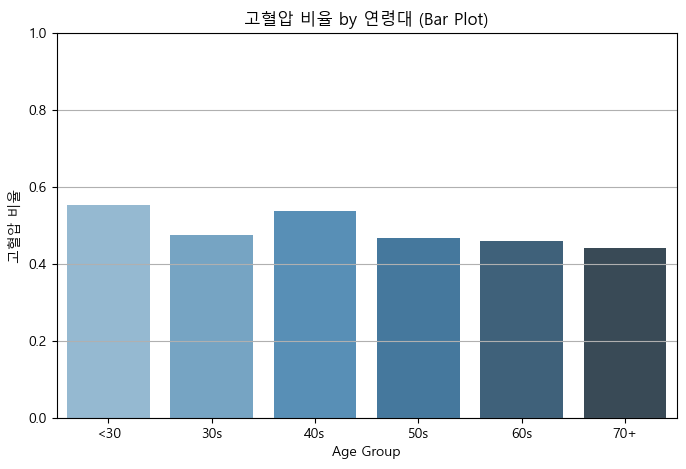

In [55]:
# 막대그래프랑 직선그래프 고혈압이랑 나이로 해야함 ! 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Age 그룹 나누기
bins = [0, 30, 40, 50, 60, 70, 100]
labels = ['<30', '30s', '40s', '50s', '60s', '70+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 각 그룹별 고혈압 비율 평균 계산
grouped = df.groupby('Age_Group')['Blood_Pressure_Abnormality'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Age_Group', y='Blood_Pressure_Abnormality', data=grouped, palette='Blues_d')
plt.title('고혈압 비율 by 연령대 (Bar Plot)')
plt.xlabel('Age Group')
plt.ylabel('고혈압 비율')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

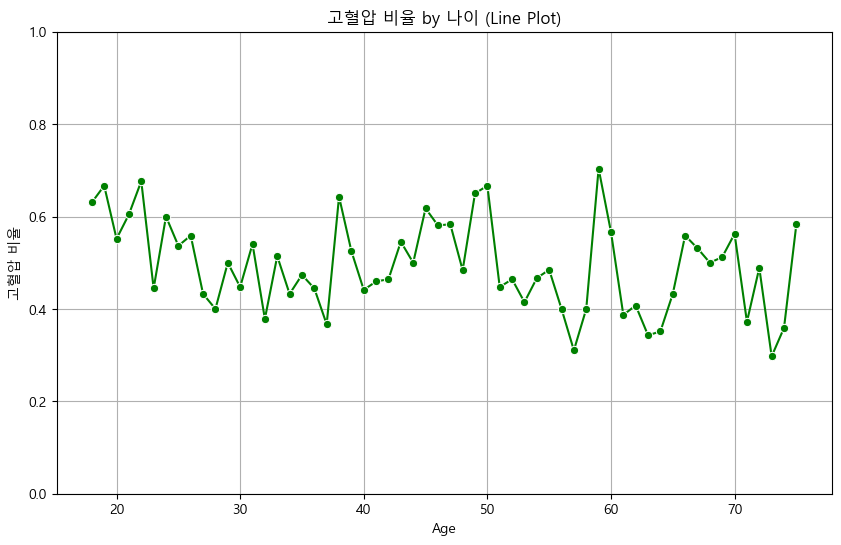

In [57]:
# Age별 고혈압 비율 계산
line_data = df.groupby('Age')['Blood_Pressure_Abnormality'].mean().reset_index()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Blood_Pressure_Abnormality', data=line_data, marker='o', color='green')
plt.title('고혈압 비율 by 나이 (Line Plot)')
plt.xlabel('Age')
plt.ylabel('고혈압 비율')
plt.grid(True)
plt.ylim(0, 1)
plt.show()

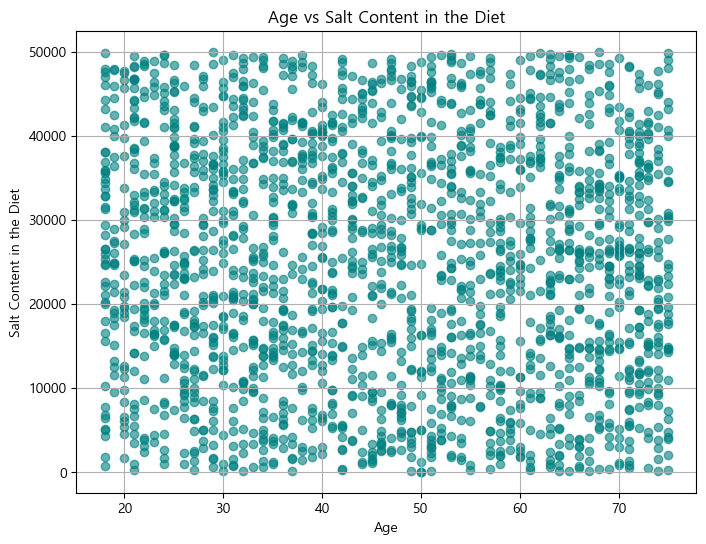

In [53]:
# age에 따른 염분 섭취량 

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df["Age"], df["salt_content_in_the_diet"], color='teal', alpha=0.6)
plt.title("Age vs Salt Content in the Diet")
plt.xlabel("Age")
plt.ylabel("Salt Content in the Diet")
plt.grid(True)
plt.show()

#### pytorch 분류 시작! 

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/min22/Desktop/Artifical intelligence/BP_data.csv")
df


,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [73]:
# 결측치 확인
print("\n 결측값 확인:")
print(df.isnull().sum())


 결측값 확인:
Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64


In [75]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [77]:
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
6,7,1,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1
15,16,1,10.96,0.10,43,27,1,1.0,0,7329,39018,495.0,1,1,0
28,29,1,9.37,0.95,38,11,1,0.0,0,30738,48217,336.0,1,1,1
30,31,0,14.19,0.37,40,46,1,0.0,0,3922,39971,8.0,3,0,1
35,36,0,10.49,0.54,25,16,1,1.0,0,14798,26236,449.0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,1961,1,8.89,0.76,35,16,1,0.0,1,40347,13334,362.0,3,1,1
1961,1962,0,12.15,0.72,27,19,1,0.0,0,4671,6349,485.0,3,1,0
1965,1966,0,11.12,0.57,29,36,1,1.0,0,12563,33617,123.0,1,0,0
1969,1970,1,14.74,0.88,33,50,1,0.0,0,34155,36707,62.0,1,1,0


In [79]:
# 레이블 갯수 확인(숫자)
df['Blood_Pressure_Abnormality'].value_counts()

Blood_Pressure_Abnormality
1    163
0    155
Name: count, dtype: int64

##### 여기서 밑에 코드 용도가 범주형 컬럼 자동 탐지인데 이거랑 결측치 처리는 다름 

In [82]:
from sklearn.preprocessing import LabelEncoder

# 범주형 컬럼 자동 탐지
categorical_cols = df.select_dtypes(include=['object']).columns

# One-Hot Encoding 적용
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df = df_encoded

In [86]:
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
6,7,1,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1
15,16,1,10.96,0.10,43,27,1,1.0,0,7329,39018,495.0,1,1,0
28,29,1,9.37,0.95,38,11,1,0.0,0,30738,48217,336.0,1,1,1
30,31,0,14.19,0.37,40,46,1,0.0,0,3922,39971,8.0,3,0,1
35,36,0,10.49,0.54,25,16,1,1.0,0,14798,26236,449.0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,1961,1,8.89,0.76,35,16,1,0.0,1,40347,13334,362.0,3,1,1
1961,1962,0,12.15,0.72,27,19,1,0.0,0,4671,6349,485.0,3,1,0
1965,1966,0,11.12,0.57,29,36,1,1.0,0,12563,33617,123.0,1,0,0
1969,1970,1,14.74,0.88,33,50,1,0.0,0,34155,36707,62.0,1,1,0


In [88]:
X = df.drop('Blood_Pressure_Abnormality', axis=1)
X.head()

,Patient_Number,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
6,7,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1
15,16,10.96,0.10,43,27,1,1.0,0,7329,39018,495.0,1,1,0
28,29,9.37,0.95,38,11,1,0.0,0,30738,48217,336.0,1,1,1
30,31,14.19,0.37,40,46,1,0.0,0,3922,39971,8.0,3,0,1
35,36,10.49,0.54,25,16,1,1.0,0,14798,26236,449.0,3,0,0


In [90]:
y = df['Blood_Pressure_Abnormality']
y.head()

6     1
15    1
28    1
30    0
35    0
Name: Blood_Pressure_Abnormality, dtype: int64

In [92]:
X = df.drop('Blood_Pressure_Abnormality', axis=1).values

In [94]:
y = y.values

In [96]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [98]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((254, 14), (64, 14), (254,), (64,))

In [116]:

import torch

# Convert to PyTorch tensors
X_train = X_train.clone().detach().float()
y_train = y_train.clone().detach().long()
X_test = X_test.clone().detach().float()
y_test = y_test.clone().detach().long()

C:\Users\min22\AppData\Local\Temp\ipykernel_22636\747558720.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\min22\AppData\Local\Temp\ipykernel_22636\747558720.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.int64)
C:\Users\min22\AppData\Local\Temp\ipykernel_22636\747558720.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
C:\Users\min22\AppData\Local\Temp\ipykernel_22636\747558720.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.int64) 
 #### 이런 오류가 갑자기 뜸  그래서 
X_train = X_train.clone().detach().float()
y_train = y_train.clone().detach().long()
X_test = X_test.clone().detach().float()
y_test = y_test.clone().detach().long() 원래 쓰던거랑 다르게 사용

In [108]:
from torch.utils.data import TensorDataset, DataLoader

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [110]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([254, 14]),
 torch.Size([64, 14]),
 torch.Size([254]),
 torch.Size([64]))

In [120]:
import torch.nn as nn
import torch.optim as optim

class CarEvaluationDense(nn.Module):
    def __init__(self):
        super(CarEvaluationDense, self).__init__()
        self.fc1 = nn.Linear(14, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 4) 
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = CarEvaluationDense()

In [122]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [124]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 216.2116, Accuracy: 50.00%
Epoch 2/20, Loss: 60.5647, Accuracy: 43.75%
Epoch 3/20, Loss: 41.1118, Accuracy: 43.75%
Epoch 4/20, Loss: 26.0536, Accuracy: 60.94%
Epoch 5/20, Loss: 25.3549, Accuracy: 59.38%
Epoch 6/20, Loss: 24.0571, Accuracy: 59.38%
Epoch 7/20, Loss: 9.2434, Accuracy: 43.75%
Epoch 8/20, Loss: 8.1360, Accuracy: 40.62%
Epoch 9/20, Loss: 5.3324, Accuracy: 51.56%
Epoch 10/20, Loss: 6.1452, Accuracy: 56.25%
Epoch 11/20, Loss: 7.2268, Accuracy: 40.62%
Epoch 12/20, Loss: 6.2450, Accuracy: 42.19%
Epoch 13/20, Loss: 7.2969, Accuracy: 57.81%
Epoch 14/20, Loss: 7.9542, Accuracy: 42.19%
Epoch 15/20, Loss: 3.4282, Accuracy: 60.94%
Epoch 16/20, Loss: 5.4940, Accuracy: 60.94%
Epoch 17/20, Loss: 8.5431, Accuracy: 40.62%
Epoch 18/20, Loss: 7.2743, Accuracy: 42.19%
Epoch 19/20, Loss: 6.3049, Accuracy: 56.25%
Epoch 20/20, Loss: 6.2198, Accuracy: 48.44%
Training complete.


In [132]:
import pandas as pd

df = pd.read_csv('C:/Users/min22/Desktop/Artifical intelligence/BP_data.csv')

# 타겟 분포 확인
print("✅ 타겟 클래스 분포:")
print(df.iloc[:, -1].value_counts())

# 결측치 여부
print("\n❓ 결측치 여부:")
print(df.isnull().sum())

# 전체 데이터 크기
print("\n📐 데이터셋 크기:")
print(df.shape)

# 첫 5개 row 확인
print("\n🔍 샘플 데이터:")
print(df.head())

✅ 타겟 클래스 분포:
Adrenal_and_thyroid_disorders
0    1113
1     887
Name: count, dtype: int64

❓ 결측치 여부:
Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

📐 데이터셋 크기:
(2000, 15)

🔍 샘플 데이터:
   Patient_Number  Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
0               1                           1                11.28   
1               2                           0                 9.75   
2               3                           1                10.79   
3  

In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# 데이터 로드
df = pd.read_csv('C:/Users/min22/Desktop/Artifical intelligence/BP_data.csv')

# 불필요한 열 제거
df.drop(columns=['Patient_Number'], inplace=True)

# 결측치 채우기 (수치형 평균으로)
df.fillna(df.mean(numeric_only=True), inplace=True)

# 타겟
y = df['Adrenal_and_thyroid_disorders'].values
X = df.drop(columns=['Adrenal_and_thyroid_disorders']).values

# 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 텐서로 변환
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# 클래스 가중치 계산
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y.numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# train/test 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64)

# 모델 정의
class Net(nn.Module):
    def __init__(self, in_features):
        super(Net, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.LeakyReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.model(x)

# 모델, 손실 함수, 옵티마이저
model = Net(X.shape[1])
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)

# 학습 루프
for epoch in range(40):
    model.train()
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    scheduler.step()

    # 검증
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for xb, yb in test_loader:
            out = model(xb)
            pred = torch.argmax(out, dim=1)
            correct += (pred == yb).sum().item()
            total += yb.size(0)

    acc = correct / total * 100
    print(f"Epoch {epoch+1:2d} - Accuracy: {acc:.2f}%")

Epoch  1 - Accuracy: 64.25%
Epoch  2 - Accuracy: 64.00%
Epoch  3 - Accuracy: 64.75%
Epoch  4 - Accuracy: 64.50%
Epoch  5 - Accuracy: 65.25%
Epoch  6 - Accuracy: 65.50%
Epoch  7 - Accuracy: 65.00%
Epoch  8 - Accuracy: 65.00%
Epoch  9 - Accuracy: 65.25%
Epoch 10 - Accuracy: 65.75%
Epoch 11 - Accuracy: 64.75%
Epoch 12 - Accuracy: 64.25%
Epoch 13 - Accuracy: 63.75%
Epoch 14 - Accuracy: 64.75%
Epoch 15 - Accuracy: 64.25%
Epoch 16 - Accuracy: 64.00%
Epoch 17 - Accuracy: 64.00%
Epoch 18 - Accuracy: 63.75%
Epoch 19 - Accuracy: 63.25%
Epoch 20 - Accuracy: 62.75%
Epoch 21 - Accuracy: 62.50%
Epoch 22 - Accuracy: 63.75%
Epoch 23 - Accuracy: 64.00%
Epoch 24 - Accuracy: 63.00%
Epoch 25 - Accuracy: 63.00%
Epoch 26 - Accuracy: 61.25%
Epoch 27 - Accuracy: 62.50%
Epoch 28 - Accuracy: 62.50%
Epoch 29 - Accuracy: 63.50%
Epoch 30 - Accuracy: 62.25%
Epoch 31 - Accuracy: 62.50%
Epoch 32 - Accuracy: 63.75%
Epoch 33 - Accuracy: 62.25%
Epoch 34 - Accuracy: 61.00%
Epoch 35 - Accuracy: 62.00%
Epoch 36 - Accuracy:

C:\Users\min22\AppData\Local\Temp\ipykernel_22636\33308099.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)



✅ 정확도: 64.00%

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       223
           1       0.60      0.58      0.59       177

    accuracy                           0.64       400
   macro avg       0.63      0.63      0.63       400
weighted avg       0.64      0.64      0.64       400



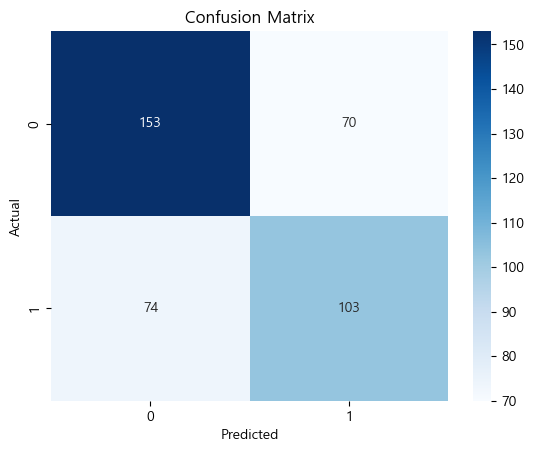

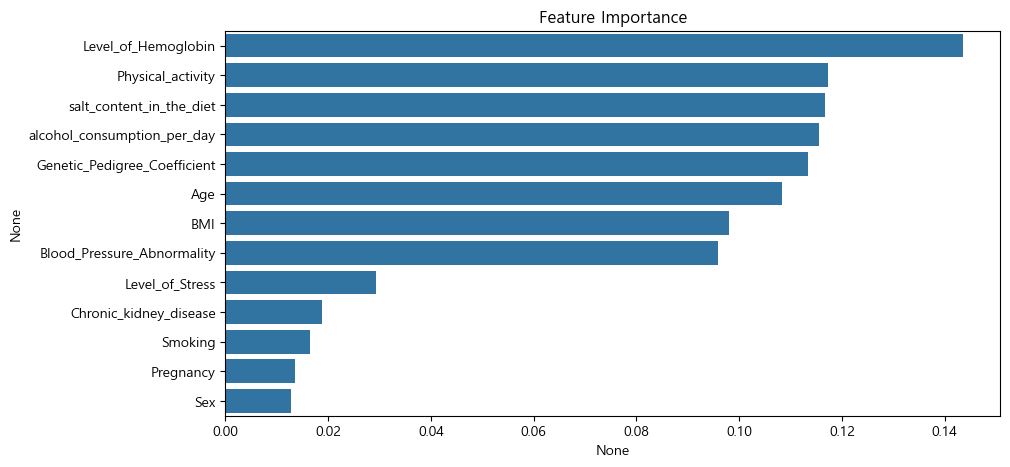


❗ 제거 고려 피처:
 Chronic_kidney_disease    0.018827
Smoking                   0.016440
Pregnancy                 0.013562
Sex                       0.012685
dtype: float64
